In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_excel('data/default of credit card clients.xls',
                   skiprows=1, index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# double-check datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
report = ProfileReport(df, interactions=None)
report.to_file('cc_defaults.html')

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.corr().loc['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [7]:
train_features = df.drop('default payment next month', axis=1)
train_targets = df['default payment next month']

### sklearn logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr_sklearn = LogisticRegression()
lr_sklearn.fit(train_features, train_targets)

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
lr_sklearn.score(train_features, train_targets)

0.7788333333333334

In [10]:
predictions = lr_sklearn.predict(train_features)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
lr_sklearn.predict(train_features.iloc[-1].values.reshape(1, -1))

array([0], dtype=int64)

In [12]:
lr_sklearn.predict_proba(train_features)

array([[0.54131094, 0.45868906],
       [0.6588108 , 0.3411892 ],
       [0.65863874, 0.34136126],
       ...,
       [0.59330578, 0.40669422],
       [0.97733718, 0.02266282],
       [0.60781983, 0.39218017]])

In [13]:
proba_predictions = lr_sklearn.predict_proba(train_features)[:, 1]
proba_predictions = (proba_predictions >= 0.5).astype('int')

In [14]:
import numpy as np

predictions = lr_sklearn.predict(train_features)
np.array_equal(predictions, np.round(proba_predictions))

True

#### Predicting the probability for a single datapoint

In [15]:
train_features.iloc[-1].values.reshape(1, -1)

array([[50000,     1,     2,     1,    46,     0,     0,     0,     0,
            0,     0, 47929, 48905, 49764, 36535, 32428, 15313,  2078,
         1800,  1430,  1000,  1000,  1000]], dtype=int64)

In [16]:
train_targets.iloc[-1]

1

In [17]:
lr_sklearn.predict_proba(train_features.iloc[-1].values.reshape(1, -1))

array([[0.60781983, 0.39218017]])

In [18]:
lr_sklearn.intercept_

array([-2.24787236e-05])

In [19]:
lr_sklearn.coef_

array([[-5.06177343e-06, -3.90446868e-05, -4.82745782e-05,
        -4.08715527e-05, -6.92322951e-04,  5.07369368e-05,
         3.93865772e-05,  3.47618425e-05,  3.27594999e-05,
         3.07863744e-05,  2.88064776e-05, -7.78121905e-06,
        -1.41072820e-07,  2.43687727e-06,  3.72324127e-06,
         2.41691974e-06,  3.86007077e-06, -3.79852820e-05,
        -2.65879985e-05, -1.43901048e-05, -1.07653375e-05,
        -1.02284404e-05,  4.03456498e-07]])

In [20]:
np.exp(lr_sklearn.coef_)

array([[0.99999494, 0.99996096, 0.99995173, 0.99995913, 0.99930792,
        1.00005074, 1.00003939, 1.00003476, 1.00003276, 1.00003079,
        1.00002881, 0.99999222, 0.99999986, 1.00000244, 1.00000372,
        1.00000242, 1.00000386, 0.99996202, 0.99997341, 0.99998561,
        0.99998923, 0.99998977, 1.0000004 ]])

### Re-fit to scaled data, then plot feature importances

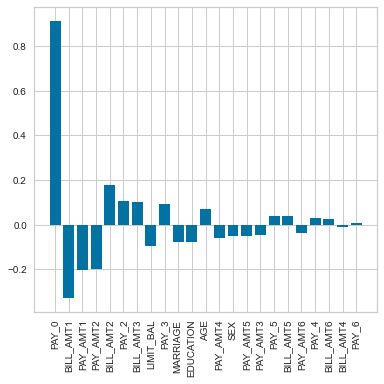

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features)
scaled_lr_model = LogisticRegression(random_state=42)
scaled_lr_model.fit(scaled_features, train_targets)

logit_coef = np.exp(scaled_lr_model.coef_[0]) - 1
idx = abs(logit_coef).argsort()[::-1]
f = plt.figure(figsize=(5.5, 5.5))
plt.bar(range(len(idx)), logit_coef[idx])
_ = plt.xticks(range(len(idx)), train_features.columns[idx], rotation=90)
plt.tight_layout()
plt.savefig('B17030_11_02.png', dpi=300)

### Statsmodels logistic regression

In [22]:
import statsmodels.api as sm

lr_model = sm.Logit(train_targets, sm.add_constant(train_features))
lr_results = lr_model.fit()
lr_results.summary()

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29976
Method:                                   MLE   Df Model:                           23
Date:                        Mon, 29 Mar 2021   Pseudo R-squ.:                  0.1207
Time:                                21:09:56   Log-Likelihood:                -13939.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6863      0.119     -5.784      0.000      -0.919      -0.454
LIMIT_BAL  -7.623e-07   1.57e-07     -4.859      0.000   -1.07e-06   -4.55e-07
SEX           -0.1087      0.031     -3.541      0.000      -0.169      -0.049
EDUCATION     -0.1016      0.021     -4.844      0.000      -0.143      -0.060
MARRIAGE      -0.1544      0.032     -4.869      0.000      -0.216      -0.092
AGE            0.0074      0.002      4.170      0.000       0.004       0.011
PAY_0          0.5774      0.018     32.632      0.000       0.543       0.612
PAY_2          0.0828      0.020      4.103      0.000       0.043       0.122
PAY_3          0.0721      0.023      3.192      0.001       0.028       0.116
PAY_4          0.0239      0.025      0.956      0.339      -0.025       0.073
PAY_5          0.0340      0.027      1.266      0.206      -0.019       0.087
PAY_6          0.0080      0.022      0.363      0.716      -0.035       0.051
BILL_AMT1  -5.492e-06   1.14e-06     -4.835      0.000   -7.72e-06   -3.27e-06
BILL_AMT2   2.356e-06    1.5e-06      1.566      0.117   -5.92e-07     5.3e-06
BILL_AMT3   1.365e-06   1.32e-06      1.032      0.302   -1.23e-06    3.96e-06
BILL_AMT4  -1.821e-07   1.35e-06     -0.135      0.893   -2.83e-06    2.46e-06
BILL_AMT5   6.155e-07   1.52e-06      0.405      0.685   -2.36e-06    3.59e-06
BILL_AMT6   3.938e-07   1.19e-06      0.330      0.742   -1.95e-06    2.74e-06
PAY_AMT1   -1.363e-05   2.31e-06     -5.913      0.000   -1.81e-05   -9.11e-06
PAY_AMT2   -9.616e-06   2.09e-06     -4.590      0.000   -1.37e-05   -5.51e-06
PAY_AMT3   -2.742e-06   1.72e-06     -1.592      0.111   -6.12e-06    6.34e-07
PAY_AMT4   -4.023e-06   1.78e-06     -2.254      0.024   -7.52e-06   -5.25e-07
PAY_AMT5   -3.311e-06   1.78e-06     -1.864      0.062   -6.79e-06    1.71e-07
PAY_AMT6   -2.064e-06    1.3e-06     -1.593      0.111    -4.6e-06    4.76e-07
==============================================================================
"""

In [23]:
lr_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.121     
Dependent Variable: default payment next month AIC:              27925.2001
Date:               2021-03-29 21:09           BIC:              28124.6150
No. Observations:   30000                      Log-Likelihood:   -13939.   
Df Model:           23                         LL-Null:          -15853.   
Df Residuals:       29976                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const           -0.6863      0.1187    -5.7838    0.0000    -0.9188    -0.4537
LIMIT_BAL       -0.0000      0.0000    -4.8587    0.0000    -0.0000    -0.0000
SEX             -0.1087      0.0307    -3.5408    0.0004    -0.1688    -0.0485
EDUCATION       -0.1016      0.0210    -4.8444    0.0000    -0.1427    -0.0605
MARRIAGE        -0.1544      0.0317    -4.8687    0.0000    -0.2165    -0.0922
AGE              0.0074      0.0018     4.1703    0.0000     0.0039     0.0109
PAY_0            0.5774      0.0177    32.6324    0.0000     0.5427     0.6121
PAY_2            0.0828      0.0202     4.1033    0.0000     0.0433     0.1224
PAY_3            0.0721      0.0226     3.1915    0.0014     0.0278     0.1164
PAY_4            0.0239      0.0250     0.9555    0.3393    -0.0251     0.0729
PAY_5            0.0340      0.0269     1.2655    0.2057    -0.0187     0.0867
PAY_6            0.0080      0.0221     0.3632    0.7164    -0.0353     0.0514
BILL_AMT1       -0.0000      0.0000    -4.8352    0.0000    -0.0000    -0.0000
BILL_AMT2        0.0000      0.0000     1.5663    0.1173    -0.0000     0.0000
BILL_AMT3        0.0000      0.0000     1.0320    0.3021    -0.0000     0.0000
BILL_AMT4       -0.0000      0.0000    -0.1350    0.8926    -0.0000     0.0000
BILL_AMT5        0.0000      0.0000     0.4053    0.6852    -0.0000     0.0000
BILL_AMT6        0.0000      0.0000     0.3296    0.7417    -0.0000     0.0000
PAY_AMT1        -0.0000      0.0000    -5.9131    0.0000    -0.0000    -0.0000
PAY_AMT2        -0.0000      0.0000    -4.5903    0.0000    -0.0000    -0.0000
PAY_AMT3        -0.0000      0.0000    -1.5917    0.1115    -0.0000     0.0000
PAY_AMT4        -0.0000      0.0000    -2.2542    0.0242    -0.0000    -0.0000
PAY_AMT5        -0.0000      0.0000    -1.8635    0.0624    -0.0000     0.0000
PAY_AMT6        -0.0000      0.0000    -1.5928    0.1112    -0.0000     0.0000
===========================================================================

"""

In [24]:
selected_features = sm.add_constant(
    train_features).loc[:, lr_results.pvalues < 0.05]
lr_model_trimmed = sm.Logit(train_targets, selected_features)
lr_trimmed_results = lr_model_trimmed.fit()
lr_trimmed_results.summary()

Optimization terminated successfully.
         Current function value: 0.465428
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29987
Method:                                   MLE   Df Model:                           12
Date:                        Mon, 29 Mar 2021   Pseudo R-squ.:                  0.1192
Time:                                21:09:57   Log-Likelihood:                -13963.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7030      0.118     -5.936      0.000      -0.935      -0.471
LIMIT_BAL   -8.98e-07   1.53e-07     -5.889      0.000    -1.2e-06   -5.99e-07
SEX           -0.1048      0.031     -3.419      0.001      -0.165      -0.045
EDUCATION     -0.1044      0.021     -4.994      0.000      -0.145      -0.063
MARRIAGE      -0.1572      0.032     -4.966      0.000      -0.219      -0.095
AGE            0.0076      0.002      4.260      0.000       0.004       0.011
PAY_0          0.5920      0.018     33.765      0.000       0.558       0.626
PAY_2          0.0848      0.020      4.257      0.000       0.046       0.124
PAY_3          0.1200      0.018      6.525      0.000       0.084       0.156
BILL_AMT1  -1.766e-06   2.64e-07     -6.690      0.000   -2.28e-06   -1.25e-06
PAY_AMT1   -1.169e-05   2.08e-06     -5.624      0.000   -1.58e-05   -7.61e-06
PAY_AMT2   -8.209e-06   1.79e-06     -4.577      0.000   -1.17e-05   -4.69e-06
PAY_AMT4   -4.396e-06   1.55e-06     -2.834      0.005   -7.44e-06   -1.36e-06
==============================================================================
"""

In [25]:
lr_trimmed_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.119     
Dependent Variable: default payment next month AIC:              27951.6577
Date:               2021-03-29 21:09           BIC:              28059.6741
No. Observations:   30000                      Log-Likelihood:   -13963.   
Df Model:           12                         LL-Null:          -15853.   
Df Residuals:       29987                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const           -0.7030      0.1184    -5.9358    0.0000    -0.9351    -0.4709
LIMIT_BAL       -0.0000      0.0000    -5.8885    0.0000    -0.0000    -0.0000
SEX             -0.1048      0.0306    -3.4192    0.0006    -0.1648    -0.0447
EDUCATION       -0.1044      0.0209    -4.9940    0.0000    -0.1453    -0.0634
MARRIAGE        -0.1572      0.0317    -4.9659    0.0000    -0.2192    -0.0951
AGE              0.0076      0.0018     4.2602    0.0000     0.0041     0.0111
PAY_0            0.5920      0.0175    33.7648    0.0000     0.5577     0.6264
PAY_2            0.0848      0.0199     4.2571    0.0000     0.0458     0.1239
PAY_3            0.1200      0.0184     6.5253    0.0000     0.0840     0.1561
BILL_AMT1       -0.0000      0.0000    -6.6899    0.0000    -0.0000    -0.0000
PAY_AMT1        -0.0000      0.0000    -5.6240    0.0000    -0.0000    -0.0000
PAY_AMT2        -0.0000      0.0000    -4.5775    0.0000    -0.0000    -0.0000
PAY_AMT4        -0.0000      0.0000    -2.8337    0.0046    -0.0000    -0.0000
===========================================================================

"""

In [26]:
lr_trimmed_results.predict(selected_features)

ID
1        0.526598
2        0.143535
3        0.206673
4        0.236682
5        0.132577
           ...   
29996    0.142965
29997    0.109561
29998    0.853243
29999    0.172265
30000    0.269257
Length: 30000, dtype: float64

In [27]:
predictions = (lr_trimmed_results.predict(
    selected_features) > 0.5).astype('int')

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, predictions)

0.8091

Using the same Newton solver with sklearn yields similar accuracy and coefficients as with statsmodels:

In [29]:
lr_sklearn = LogisticRegression(solver='newton-cg', max_iter=1000)
lr_sklearn.fit(train_features, train_targets)
print(lr_sklearn.score(train_features, train_targets))
lr_sklearn.coef_

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarn

0.8111333333333334


C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.wa

array([[-7.67509585e-07, -1.11541446e-01, -1.02914717e-01,
        -1.58493994e-01,  7.19433327e-03,  5.76981396e-01,
         8.28842458e-02,  7.21255674e-02,  2.39009041e-02,
         3.39748449e-02,  8.13785255e-03, -5.49513622e-06,
         2.35742414e-06,  1.36769690e-06, -1.82707231e-07,
         6.15478314e-07,  3.93872650e-07, -1.36461581e-05,
        -9.62486010e-06, -2.74457801e-06, -4.02789437e-06,
        -3.31091456e-06, -2.06512146e-06]])

In [30]:
lr_sklearn.n_iter_

array([190])

In [31]:
accuracy_score(train_targets, (lr_results.predict(
    sm.add_constant(train_features)) > 0.5).astype('int'))

0.8109666666666666

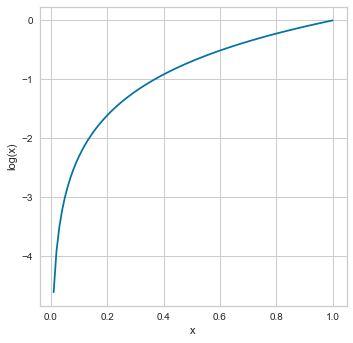

In [32]:
f = plt.figure(figsize=(5.5, 5.5))
x = np.linspace(0.01, 1, 100)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('log(x)')
plt.savefig('B17030_11_04.png', dpi=300)

## Regularization

In [33]:
lr_sklearn = LogisticRegression(penalty='l1', solver='liblinear')
lr_sklearn.fit(train_features, train_targets)
print(lr_sklearn.score(train_features, train_targets))
lr_sklearn.coef_

0.8110666666666667


array([[-7.66211171e-07, -1.09844103e-01, -1.01972827e-01,
        -1.56390230e-01,  7.26585672e-03,  5.77146581e-01,
         8.27047959e-02,  7.21125646e-02,  2.38470952e-02,
         3.39675973e-02,  7.99144068e-03, -5.45815201e-06,
         2.29701082e-06,  1.39608839e-06, -1.91110815e-07,
         6.22461209e-07,  3.92668716e-07, -1.36057738e-05,
        -9.64900459e-06, -2.74025211e-06, -4.03292571e-06,
        -3.31122211e-06, -2.06816967e-06]])

In [34]:
lr_sklearn.n_iter_

array([21], dtype=int32)

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features)

lr_sklearn = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lr_sklearn.fit(scaled_features, train_targets)
print(lr_sklearn.score(scaled_features, train_targets))
lr_sklearn.coef_

0.8090666666666667


array([[-0.09179527, -0.03149405, -0.04191172, -0.0580727 ,  0.04759958,
         0.63876412,  0.092599  ,  0.09008615,  0.02352473,  0.03720568,
         0.00523245, -0.11606074,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.12243242, -0.09714386, -0.02071323,
        -0.0307947 , -0.0278557 , -0.019394  ]])

In [36]:
# intercept is not 0
lr_sklearn.intercept_

array([-1.40797784])

In [37]:
train_features.columns[lr_sklearn.coef_[0] == 0]

Index(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], dtype='object')

#### Regularization with statsmodels

In [38]:
scaled_features_df = pd.DataFrame(
    scaled_features, columns=train_features.columns, index=train_features.index)
lr_model = sm.Logit(train_targets, sm.add_constant(scaled_features_df))
reg_results = lr_model.fit_regularized(alpha=100)
reg_results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47567931369409666
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Mon, 29 Mar 2021   Pseudo R-squ.:                  0.1187
Time:                                21:10:04   Log-Likelihood:                -13970.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4080      0.016    -88.843      0.000      -1.439      -1.377
LIMIT_BAL     -0.0918      0.020     -4.634      0.000      -0.131      -0.053
SEX           -0.0315      0.015     -2.122      0.034      -0.061      -0.002
EDUCATION     -0.0419      0.016     -2.600      0.009      -0.074      -0.010
MARRIAGE      -0.0581      0.016     -3.562      0.000      -0.090      -0.026
AGE            0.0476      0.016      2.933      0.003       0.016       0.079
PAY_0          0.6387      0.020     32.484      0.000       0.600       0.677
PAY_2          0.0926      0.024      3.869      0.000       0.046       0.139
PAY_3          0.0901      0.027      3.384      0.001       0.038       0.142
PAY_4          0.0237      0.029      0.821      0.412      -0.033       0.080
PAY_5          0.0370      0.030      1.230      0.219      -0.022       0.096
PAY_6          0.0053      0.025      0.214      0.831      -0.044       0.054
BILL_AMT1     -0.1160      0.019     -6.130      0.000      -0.153      -0.079
BILL_AMT2           0        nan        nan        nan         nan         nan
BILL_AMT3           0        nan        nan        nan         nan         nan
BILL_AMT4           0        nan        nan        nan         nan         nan
BILL_AMT5           0        nan        nan        nan         nan         nan
BILL_AMT6           0        nan        nan        nan         nan         nan
PAY_AMT1      -0.1224      0.028     -4.330      0.000      -0.178      -0.067
PAY_AMT2      -0.0972      0.033     -2.974      0.003      -0.161      -0.033
PAY_AMT3      -0.0207      0.022     -0.919      0.358      -0.065       0.023
PAY_AMT4      -0.0308      0.021     -1.455      0.146      -0.072       0.011
PAY_AMT5      -0.0278      0.020     -1.378      0.168      -0.067       0.012
PAY_AMT6      -0.0194      0.020     -0.955      0.339      -0.059       0.020
==============================================================================
"""

## Hyperparameters and cross-validation

In [39]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100],
                             solver='liblinear',
                             penalty='l1',
                             n_jobs=-1,
                             random_state=42)
lr_cv.fit(scaled_features, train_targets)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

In [40]:
lr_cv.C_

array([1.])

In [41]:
lr_cv.scores_[1].mean(axis=0)

array([0.78556667, 0.80863333, 0.8094    , 0.80996667, 0.80993333,
       0.80993333])

### Using H2O for logistic regression
Ideally we would use the scaled version of the data here so the feature importances are more comparable.

There are a lot of settings for the GLM, which can be found in the documentation:
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html
https://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/reference/h2o.glm.html

In [42]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import h2o
h2o.init()

glm_model = H2OGeneralizedLinearEstimator(family="binomial",
                                          lambda_=0,
                                          compute_p_values=True)

hdf = h2o.H2OFrame(df)
response_col = 'default payment next month'
predictors = df.drop(response_col, axis=1).columns.tolist()

glm_model.train(predictors, response_col, training_frame=hdf)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 days 0 hours 35 mins
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_words_q5gayb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.942 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


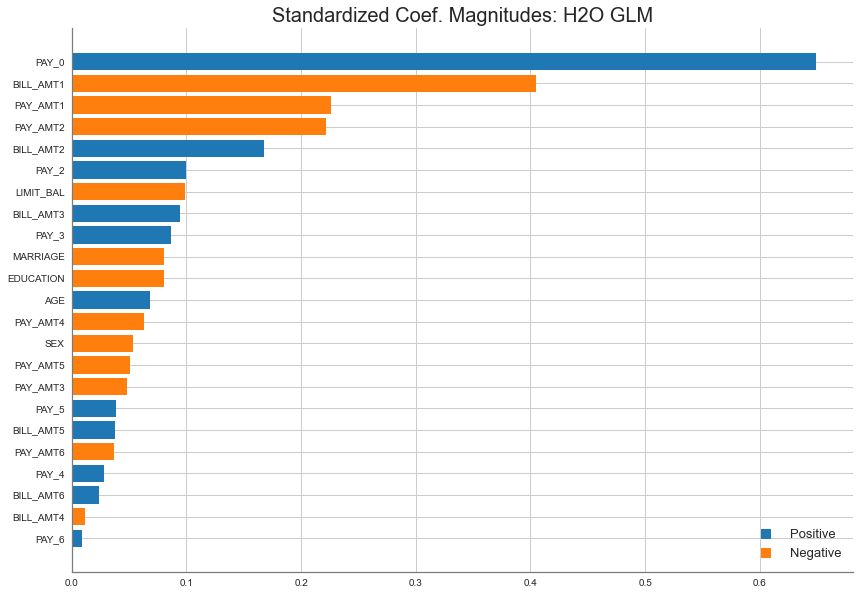

In [43]:
glm_model.std_coef_plot()

# Naive Bayes

In [44]:
df[(df['default payment next month'] == 0) & (
    df['PAY_0'] == -1)].shape[0] / df.shape[0]

0.15773333333333334

We can use other NB algos if we properly prepare our data:

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
temp_feats = train_features[['LIMIT_BAL', 'SEX']].copy()
temp_feats['LIMIT_BAL']

nb.fit(temp_feats, train_targets)
nb.score(temp_feats, train_targets)

0.7788

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_features, train_targets)
gnb.score(train_features, train_targets)

0.378

## KNN

Scale only numeric features, keep categorical features the same.

In [47]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [48]:
numeric_columns = ['LIMIT_BAL', 'AGE'] + \
    [f'BILL_AMT{i}' for i in range(1, 7)] + \
    [f'PAY_AMT{i}' for i in range(1, 7)]
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE'] + \
    ['PAY_0'] + [f'PAY_{i}' for i in range(2, 6)]

scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(train_features[numeric_columns])

scaled_features = pd.concat([pd.DataFrame(data=scaled_numeric_features, columns=numeric_columns, index=df.index),
                             train_features[categorical_columns]], axis=1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(scaled_features, train_targets)
knn.score(scaled_features, train_targets)

0.8464

# Multiclass classification

In [50]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)})
pay_0_features = df.drop(['PAY_0', 'default payment next month'], axis=1)

lr_multi = LogisticRegression(max_iter=1000)
lr_multi.fit(pay_0_features, pay_0_target)

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
lr_multi.score(pay_0_features, pay_0_target)

0.6034

In [52]:
np.unique(lr_multi.predict(pay_0_features))

array([-2, -1,  0,  1], dtype=int64)

In [53]:
pay_0_target.value_counts()

 0    14737
 1     6818
-1     5686
-2     2759
Name: PAY_0, dtype: int64

In [54]:
lr_multi.predict_proba(pay_0_features).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [55]:
lr_multi.n_iter_

array([1000])

In [56]:
lr_multi.coef_.shape

(4, 22)

In [57]:
multi_sm = sm.MNLogit(pay_0_target, sm.add_constant(pay_0_features))
multi_sm_results = multi_sm.fit()
multi_sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.762369
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  PAY_0   No. Observations:                30000
Model:                        MNLogit   Df Residuals:                    29931
Method:                           MLE   Df Model:                           66
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.3754
Time:                        21:11:19   Log-Likelihood:                -22871.
converged:                       True   LL-Null:                       -36618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
  PAY_0=-1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7368      0.328     26.622      0.000       8.094       9.380
LIMIT_BAL  -1.051e-06   2.92e-07     -3.596      0.000   -1.62e-06   -4.78e-07
SEX           -0.1590      0.072     -2.223      0.026      -0.299      -0.019
EDUCATION     -0.2542      0.044     -5.838      0.000      -0.339      -0.169
MARRIAGE      -0.0991      0.073     -1.351      0.177      -0.243       0.045
AGE            0.0074      0.004      1.684      0.092      -0.001       0.016
PAY_2          4.2855      0.114     37.478      0.000       4.061       4.510
PAY_3         -0.4013      0.079     -5.059      0.000      -0.557      -0.246
PAY_4          0.2645      0.088      3.013      0.003       0.092       0.437
PAY_5          0.1763      0.088      2.005      0.045       0.004       0.349
PAY_6          0.3368      0.070      4.840      0.000       0.200       0.473
BILL_AMT1  -1.451e-05      2e-06     -7.256      0.000   -1.84e-05   -1.06e-05
BILL_AMT2   -3.93e-05   3.27e-06    -12.005      0.000   -4.57e-05   -3.29e-05
BILL_AMT3  -8.032e-06   3.09e-06     -2.600      0.009   -1.41e-05   -1.98e-06
BILL_AMT4   2.279e-06   2.89e-06      0.789      0.430   -3.38e-06    7.94e-06
BILL_AMT5   -1.86e-06   3.16e-06     -0.589      0.556   -8.05e-06    4.33e-06
BILL_AMT6   -7.21e-06   2.64e-06     -2.734      0.006   -1.24e-05   -2.04e-06
PAY_AMT1    3.423e-05   3.06e-06     11.201      0.000    2.82e-05    4.02e-05
PAY_AMT2      3.8e-06   1.92e-06      1.975      0.048    2.95e-08    7.57e-06
PAY_AMT3    4.261e-07   2.74e-06      0.156      0.876   -4.94e-06    5.79e-06
PAY_AMT4     3.94e-07   2.84e-06      0.139      0.890   -5.17e-06    5.96e-06
PAY_AMT5    6.995e-08   2.96e-06      0.024      0.981   -5.72e-06    5.86e-06
PAY_AMT6   -2.944e-06   1.65e-06     -1.780      0.075   -6.19e-06    2.98e-07
------------------------------------------------------------------------------
   PAY_0=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9797      0.333     26.930      0.000       8.326       9.633
LIMIT_BAL  -4.532e-06   3.07e-07    -14.777      0.000   -5.13e-06   -3.93e-06
SEX           -0.2313      0.073     -3.155      0.002      -0.375      -0.088
EDUCATION     -0.0285      0.044     -0.651      0.515      -0.115       0.057
MARRIAGE       0.0287      0.075      0.383      0.702      -0.118       0.176
AGE           -0.0047      0.004     -1.053      0.292      -0.014       0.004
PAY_2          3.8719      0.114     33.887      0.000       3.648       4.096
PAY_3         -0.2820      0.079     -3.553      0.000      -0.438      -0.126
PAY_4          0.4448      0.088      5.082      0.000       0.273       0.616
PAY_5          0.2042      0.088      2.321      0.020       0.032       0.377
PAY_6          0.4338      0.070      6.226      0.000       0.297       0.570
BILL_AMT1   7.103e-06   1.76e-06      4.039      0.000    3.66e-06    1.05e-05
BI

In [58]:
multi_sm_results.predict(sm.add_constant(pay_0_features))

,0,1,2,3
ID,,,,
1,4.428132e-08,0.231129,0.096030,0.672841
2,1.021591e-08,0.216915,0.141629,0.641456
3,1.944061e-04,0.161322,0.622301,0.216183
4,1.786463e-04,0.024741,0.705208,0.269872
5,1.185660e-04,0.428542,0.373894,0.197445
...,...,...,...,...
29996,5.221196e-04,0.000011,0.967483,0.031983
29997,1.145075e-02,0.417066,0.450799,0.120684
29998,5.753944e-10,0.181388,0.090747,0.727865


## OVR and OVO

In [59]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)})
pay_0_features = df.drop(['PAY_0', 'default payment next month'], axis=1)

lr_multi_ovr = LogisticRegression(max_iter=1000, multi_class='ovr')
lr_multi_ovr.fit(pay_0_features, pay_0_target)
lr_multi_ovr.score(pay_0_features, pay_0_target)

0.5973333333333334

In [60]:
lr_multi_ovr.coef_

array([[ 3.76345238e-06, -2.61971137e-03, -3.28011577e-03,
        -2.79702379e-03, -5.63501430e-02, -2.16946575e-03,
        -1.79826830e-03, -1.46215270e-03, -1.21444071e-03,
        -1.04436617e-03, -1.15019729e-05, -3.74977417e-05,
        -1.03085787e-05, -7.82723445e-06, -7.37491773e-06,
        -7.35732438e-06,  3.68141299e-05,  1.11498189e-05,
         7.45238226e-06,  1.12219980e-05,  7.95711624e-06,
         9.84712767e-07],
       [ 1.51201052e-06, -1.06909244e-03, -1.52979012e-03,
        -1.13049415e-03, -2.17100772e-02,  6.33667138e-04,
         5.02486661e-04,  4.13478654e-04,  5.05454619e-04,
         5.18318586e-04, -1.01244896e-05, -3.89185906e-05,
        -1.11057080e-05,  2.82960701e-06, -3.41645890e-06,
        -9.01850208e-06,  4.95888152e-05,  1.17356217e-05,
         7.42923181e-06,  8.94655825e-06,  9.31301175e-06,
         3.00671749e-06],
       [-3.51922062e-06, -2.69856080e-04, -1.96600846e-04,
        -1.49742933e-04, -7.65362867e-03, -6.47084909e-04,
    

In [61]:
lr_multi.score(pay_0_features, pay_0_target)
lr_multi_ovr.score(pay_0_features, pay_0_target)

0.5973333333333334

In [62]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

lr_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
lr_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)

lr_ovr.fit(pay_0_features, pay_0_target)
lr_ovo.fit(pay_0_features, pay_0_target)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [63]:
lr_ovr.predict(pay_0_features)

array([ 0, -1,  0, ...,  0, -1,  0], dtype=int64)

In [64]:
lr_ovr.predict_proba(pay_0_features)

array([[0.1381463 , 0.24803889, 0.33036255, 0.28345226],
       [0.17816854, 0.28990241, 0.27626337, 0.25566568],
       [0.05904036, 0.17526991, 0.51039155, 0.25529818],
       ...,
       [0.07621878, 0.26694391, 0.37589221, 0.2809451 ],
       [0.0535112 , 0.48565511, 0.44754756, 0.01328613],
       [0.00330878, 0.02320897, 0.65208867, 0.32139358]])

In [65]:
lr_ovr.score(pay_0_features, pay_0_target)

0.5974333333333334

In [66]:
lr_ovr.classes_

array([-2, -1,  0,  1], dtype=int64)

In [67]:
lr_ovr.estimators_[0].coef_

array([[ 3.76268112e-06, -2.61933828e-03, -3.27965319e-03,
        -2.79661572e-03, -5.63423701e-02, -2.16909765e-03,
        -1.79796308e-03, -1.46189486e-03, -1.21422201e-03,
        -1.04417470e-03, -1.15145878e-05, -3.74830870e-05,
        -1.03233270e-05, -7.74363162e-06, -7.43077562e-06,
        -7.35369311e-06,  3.67917844e-05,  1.11560127e-05,
         7.37961470e-06,  1.12802737e-05,  7.95886961e-06,
         9.65817061e-07]])

In [68]:
lr_ovo.classes_

array([-2, -1,  0,  1], dtype=int64)

In [69]:
lr_ovo.predict(pay_0_features)[9]

-1

In [70]:
np.argwhere(lr_ovo.predict(pay_0_features) == 1)

array([[   47],
       [   64],
       [  122],
       ...,
       [29862],
       [29865],
       [29919]], dtype=int64)

In [71]:
lr_ovo.estimators_[0].predict_proba(pay_0_features)

array([[0.32962839, 0.67037161],
       [0.36312027, 0.63687973],
       [0.26720252, 0.73279748],
       ...,
       [0.21906841, 0.78093159],
       [0.15871452, 0.84128548],
       [0.15546927, 0.84453073]])

In [72]:
print(lr_ovo.score(pay_0_features, pay_0_target))
print(lr_ovr.score(pay_0_features, pay_0_target))

0.6147
0.5974333333333334


## Multioutput classifiers with multiclass and multilabel problems

In [73]:
import swifter

pay_cols = ['PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]
mo_targets = df[pay_cols].copy()
mo_targets = mo_targets.swifter.apply(lambda x: (x > 0).astype(int), axis=1)

mo_features = df[[c for c in df.columns if c not in pay_cols +
                  ['default payment next month']]]

In [74]:
mo_targets

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,
1,1,1,0,0,0,0
2,0,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
...,...,...,...,...,...,...
29996,0,0,0,0,0,0
29997,0,0,0,0,0,0
29998,1,1,1,0,0,0


In [75]:
from sklearn.multioutput import MultiOutputClassifier

mo_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
mo_clf.fit(mo_features, mo_targets)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [76]:
mo_clf.score(mo_features, mo_targets)

0.6721333333333334

In [77]:
from sklearn.multioutput import ClassifierChain

cc_clf = ClassifierChain(LogisticRegression(max_iter=1000))
cc_clf.fit(mo_features, mo_targets)
cc_clf.score(mo_features, mo_targets)

0.672

# Evaluating classification algorithm performance with metrics

In [78]:
from sklearn.model_selection import train_test_split

target_col = 'default payment next month'
x_train, x_test, y_train, y_test = train_test_split(df.drop(target_col, axis=1),
                                                    df[target_col],
                                                    train_size=0.75,
                                                    stratify=train_targets)

In [79]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Accuracy

In [80]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.7787555555555555
0.7788


In [81]:
df['default payment next month'].value_counts() / df.shape[0]

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [82]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(gnb, train_features, train_targets, n_jobs=-1).mean())
print(cross_val_score(lr_cv, train_features, train_targets, n_jobs=-1).mean())
print(cross_val_score(knn, train_features, train_targets, n_jobs=-1).mean())
print(cross_val_score(knn, scaled_features, train_targets, n_jobs=-1).mean())

0.37909999999999994
0.8097666666666667
0.7551
0.7965


In [83]:
lr_cv.fit(x_train, y_train)
lr_cv.score(x_test, y_test)

0.8092

## Cohen's Kappa

In [84]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, lr_model.predict(x_test))

0.0

In [85]:
from sklearn.metrics import make_scorer

print(cross_val_score(lr_model, train_features, train_targets, scoring=make_scorer(cohen_kappa_score), n_jobs=-1).mean())

-6.663869982279636e-05


## The confusion matrix

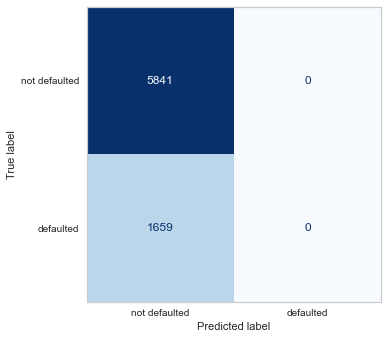

In [86]:
from sklearn.metrics import plot_confusion_matrix

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
plot_confusion_matrix(lr_model,
                      x_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      display_labels=['not defaulted', 'defaulted'],
                      colorbar=False,
                      ax=ax)
plt.grid(b=None)
plt.tight_layout()
f.savefig('B17030_11_06.png', dpi=300)

Using the yellowbrick package:

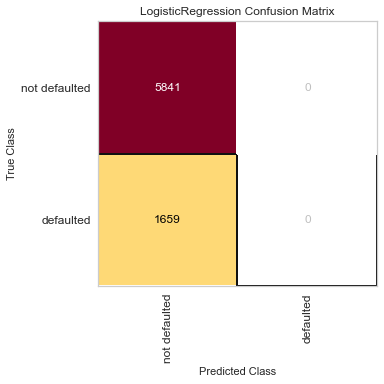

<Figure size 576x396 with 0 Axes>

In [87]:
from yellowbrick.classifier import confusion_matrix as yb_confusion_matrix

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
yb_confusion_matrix(
    lr_model,
    x_train, y_train, x_test, y_test,
    classes=['not defaulted', 'defaulted'],
    ax=ax)
plt.tight_layout()
f.savefig('B17030_11_06.png', dpi=300)

Using the mlxtend package:

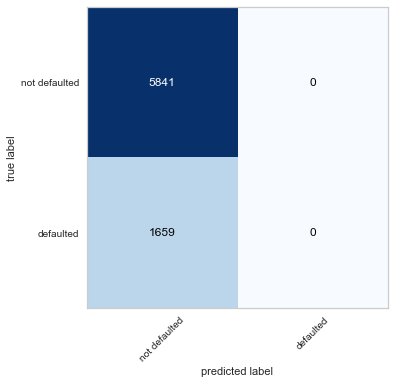

In [89]:
from mlxtend.plotting import plot_confusion_matrix as mlx_plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mlx_plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lr_model.predict(x_test)),
                     class_names=['not defaulted', 'defaulted'])
plt.tight_layout()

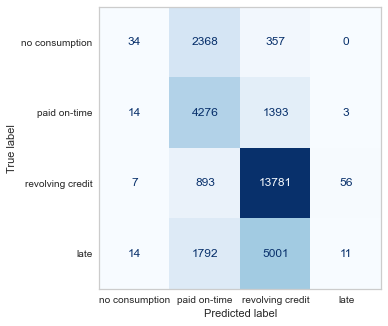

In [90]:
f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
plot_confusion_matrix(lr_multi,
                      pay_0_features,
                      pay_0_target,
                      display_labels=['no consumption', 'paid on-time', 'revolving credit', 'late'],
                      cmap=plt.cm.Blues,
                      colorbar=False,
                      ax=ax)
plt.grid(b=None)
plt.tight_layout()
f.savefig('B17030_11_07.png', dpi=300)

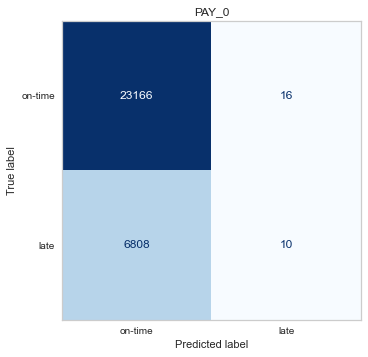

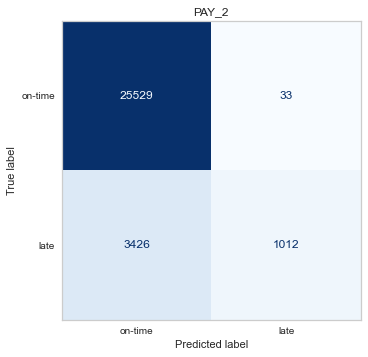

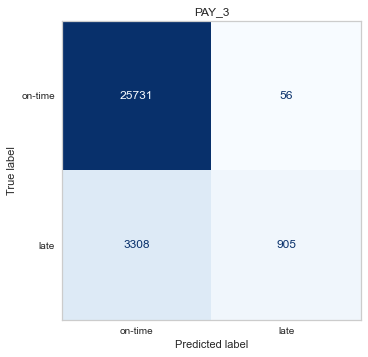

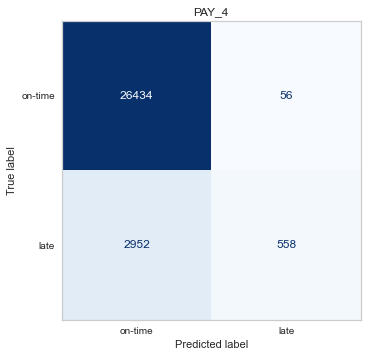

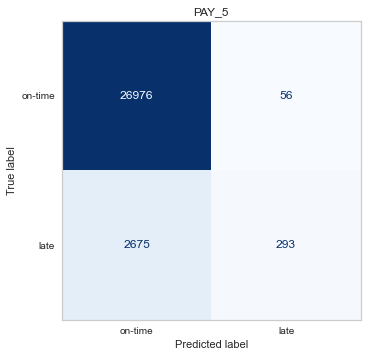

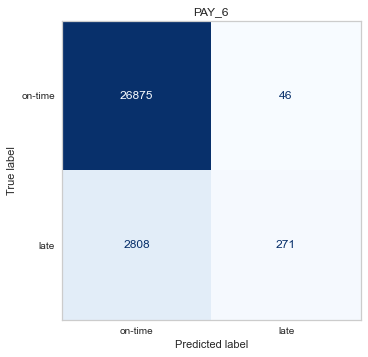

In [91]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

ml_cm = multilabel_confusion_matrix(mo_targets, mo_clf.predict(mo_features))

for i, cl in enumerate(mo_targets.columns):
    f = ConfusionMatrixDisplay(ml_cm[i], display_labels=['on-time', 'late'])
    f.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(cl)
    plt.grid(b=None)

## Precision, Recall, and the F1 score

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_model.predict(x_test), target_names=['no default', 'default']))

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  no default       0.78      1.00      0.88      5841
     default       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


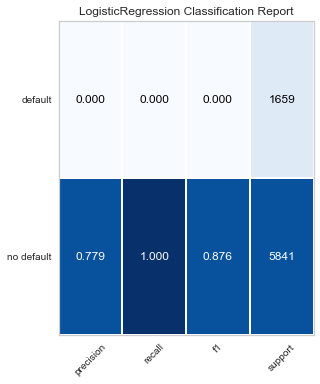

In [93]:
from yellowbrick.classifier import ClassificationReport

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
viz = ClassificationReport(lr_model,
                           support=True,
                           classes=['no default', 'default'],
                           cmap='Blues')
viz.score(x_test, y_test)
plt.gcf().delaxes(f.axes[0])
viz.show()
f.savefig('B17030_11_09.png', dpi=300)

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


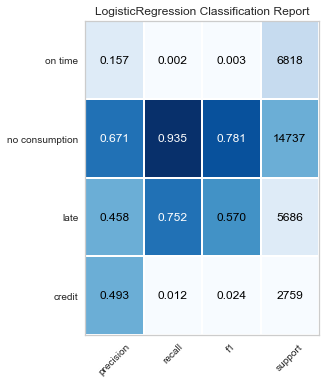

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [94]:
f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
viz = ClassificationReport(lr_multi,
                           support=True,
                           classes=['no consumption', 'on time', 'credit', 'late'],
                           cmap='Blues')
viz.score(pay_0_features, pay_0_target)
plt.gcf().delaxes(f.axes[0])
viz.show()

In [95]:
print(classification_report(pay_0_target,
                            lr_multi.predict(pay_0_features),
                            target_names=['no consumption', 'on time', 'credit', 'late']))

                precision    recall  f1-score   support

no consumption       0.49      0.01      0.02      2759
       on time       0.46      0.75      0.57      5686
        credit       0.67      0.94      0.78     14737
          late       0.16      0.00      0.00      6818

      accuracy                           0.60     30000
     macro avg       0.44      0.43      0.34     30000
  weighted avg       0.50      0.60      0.49     30000



## AUC score

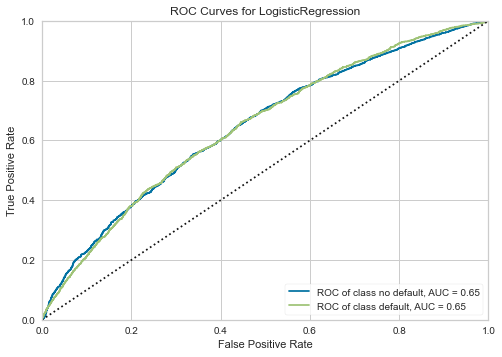

In [96]:
from yellowbrick.classifier.rocauc import roc_auc

roc = roc_auc(lr_model, x_train, y_train, x_test, y_test, classes=['no default', 'default'], macro=False, micro=False)

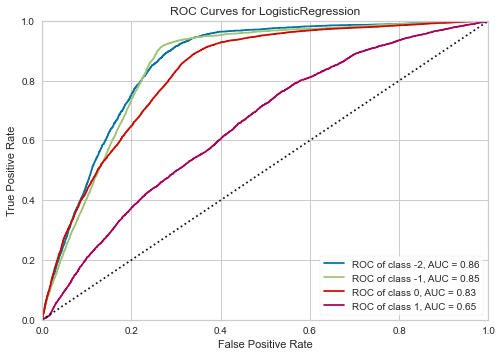

In [97]:
from sklearn.metrics import plot_roc_curve

roc = roc_auc(lr_multi, pay_0_features, pay_0_target, macro=False, micro=False)

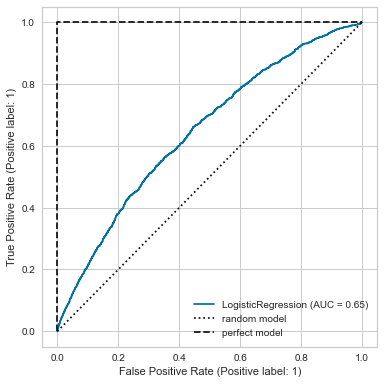

In [98]:
from sklearn.metrics import plot_roc_curve

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
roc = plot_roc_curve(lr_model, x_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], c='k', linestyle='dotted', label='random model')
plt.plot([0, 0, 1], [0, 1, 1], c='k', linestyle='dashed', label='perfect model')
plt.legend()
plt.tight_layout()
f.savefig('B17030_11_10.png', dpi=300)

In [99]:
roc.roc_auc

0.6456388653342097

### Choosing the optimal threshold

In [100]:
roc.tpr

array([0.00000000e+00, 6.02772755e-04, 6.02772755e-04, ...,
       9.99397227e-01, 1.00000000e+00, 1.00000000e+00])

In [101]:
roc.fpr

array([0.00000000e+00, 0.00000000e+00, 1.71203561e-04, ...,
       9.99486389e-01, 9.99486389e-01, 1.00000000e+00])

0.24672308152058456

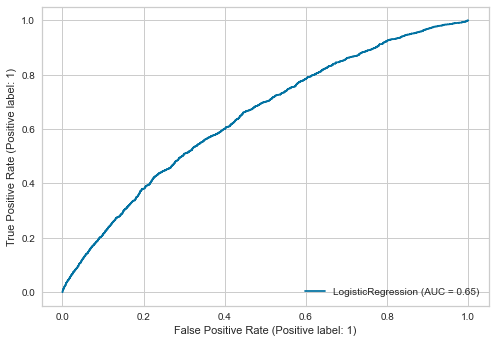

In [102]:
roc = plot_roc_curve(lr_model, x_test, y_test, drop_intermediate=False)
youdens_idx = np.argmax(roc.tpr - roc.fpr)
thresholds = np.unique(lr_model.predict_proba(x_test)[:, 1])
thresholds.sort()
thresholds = [1] + list(thresholds[::-1])
y_thresh = thresholds[youdens_idx]
y_thresh

In [103]:
upper_left_array = np.vstack((np.zeros(roc.tpr.shape[0]), np.ones(roc.tpr.shape[0]))).T
roc_curve_points = np.vstack((roc.fpr, roc.tpr)).T
topleft_idx = np.argmin(np.linalg.norm(upper_left_array - roc_curve_points, axis=1))
tl_thresh = thresholds[topleft_idx]
tl_thresh

0.24672308152058456

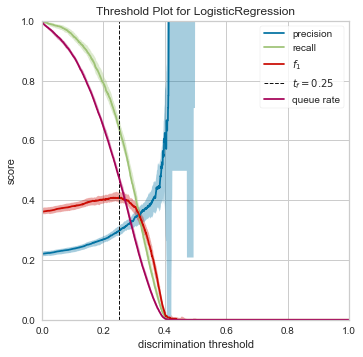

In [104]:
from yellowbrick.classifier.threshold import discrimination_threshold

f = plt.figure(figsize=(5.5, 5.5))
dt = discrimination_threshold(lr_model, x_train, y_train, show=False)
plt.savefig('B17030_11_11.png', dpi=300)

In [105]:
f_idx = dt.cv_scores_['fscore'].argmax()
f_thresh = dt.thresholds_[f_idx]
f_thresh

0.25194686211635364

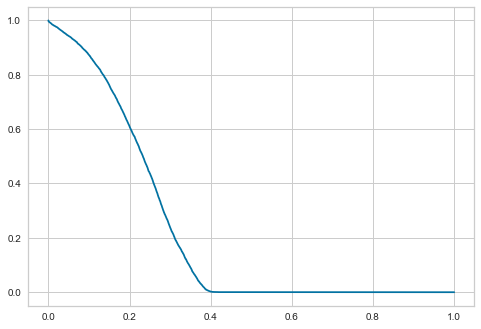

In [106]:
# the "queue rate"
plt.plot(thresholds, roc.fpr)

In [107]:
for t in [y_thresh, tl_thresh, f_thresh]:
    print(accuracy_score(y_test, lr_model.predict_proba(x_test)[:, 1] >= t))

0.5777333333333333
0.5777333333333333
0.5844


<Figure size 396x396 with 0 Axes>

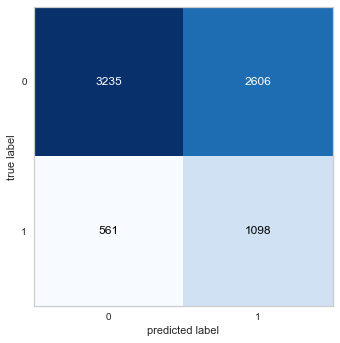

In [108]:
f = plt.figure(figsize=(5.5, 5.5))
mlx_plot_confusion_matrix(confusion_matrix(y_test, lr_model.predict_proba(x_test)[:, 1] >= y_thresh))
f.tight_layout()
plt.savefig('B17030_11_12.png', dpi=300)

# Sampling

## Downsampling

In [109]:
_, x_sample, _, y_sample = train_test_split(train_features, train_targets, test_size=0.1, stratify=train_targets)

In [110]:
np.bincount(y_sample) / y_sample.shape[0]

array([0.77866667, 0.22133333])

In [111]:
train_targets.value_counts() / train_targets.shape[0]

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [112]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(train_features, train_targets)

In [113]:
y_resampled.value_counts()

1    6636
0    6636
Name: default payment next month, dtype: int64

In [114]:
y_train.value_counts()

0    17523
1     4977
Name: default payment next month, dtype: int64

## Oversampling

In [115]:
target_col = 'default payment next month'
x_train, x_test, y_train, y_test = train_test_split(df.drop(target_col, axis=1), df[target_col], random_state=42)

In [116]:
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [117]:
y_resampled.value_counts()

1    17491
0    17491
Name: default payment next month, dtype: int64

In [118]:
lr_model = LogisticRegressionCV(max_iter=1000)
lr_model.fit(x_train, y_train)
print('unmodified:', roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1]))

unmodified: 0.6482482993072692


In [119]:
lr_model_rs = LogisticRegressionCV(max_iter=1000)
lr_model_rs.fit(x_resampled, y_resampled)
print('resampled:', roc_auc_score(y_test, lr_model_rs.predict_proba(x_test)[:, 1]))

resampled: 0.6529705649314925


## SMOTE and other synthetic sampling methods

In [120]:
from imblearn.over_sampling import KMeansSMOTE

kmSMOTE = KMeansSMOTE(random_state=42, k_neighbors=5, cluster_balance_threshold=0.2, n_jobs=-1)
x_resampled, y_resampled = kmSMOTE.fit_resample(x_train, y_train)

lr_model_rs = LogisticRegressionCV(max_iter=1000)
lr_model_rs.fit(x_resampled, y_resampled)
print('resampled:', roc_auc_score(y_test, lr_model_rs.predict_proba(x_test)[:, 1]))

resampled: 0.650524087447782


In [121]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

samplers = [
    SMOTE(random_state=42),
    BorderlineSMOTE(random_state=42, kind="borderline-1"),
    BorderlineSMOTE(random_state=42, kind="borderline-2"),
    SVMSMOTE(random_state=42),
    ADASYN(random_state=42),
    SMOTEENN(random_state=42),
    SMOTETomek(random_state=42)
]

for s in samplers:
    x_resampled, y_resampled = s.fit_resample(x_train, y_train)
    lr_model_rs = LogisticRegressionCV(max_iter=1000)
    lr_model_rs.fit(x_resampled, y_resampled)
    print(f'{str(s):<55} {roc_auc_score(y_test, lr_model_rs.predict_proba(x_test)[:, 1])}')

SMOTE(random_state=42)                                  0.6614621242859121
BorderlineSMOTE(random_state=42)                        0.6582137941059536
BorderlineSMOTE(kind='borderline-2', random_state=42)   0.6548044026757308
SVMSMOTE(random_state=42)                               0.6654890741552578
ADASYN(random_state=42)                                 0.6576074335575248
SMOTEENN(random_state=42)                               0.6545750028962769
SMOTETomek(random_state=42)                             0.6615719054759883
